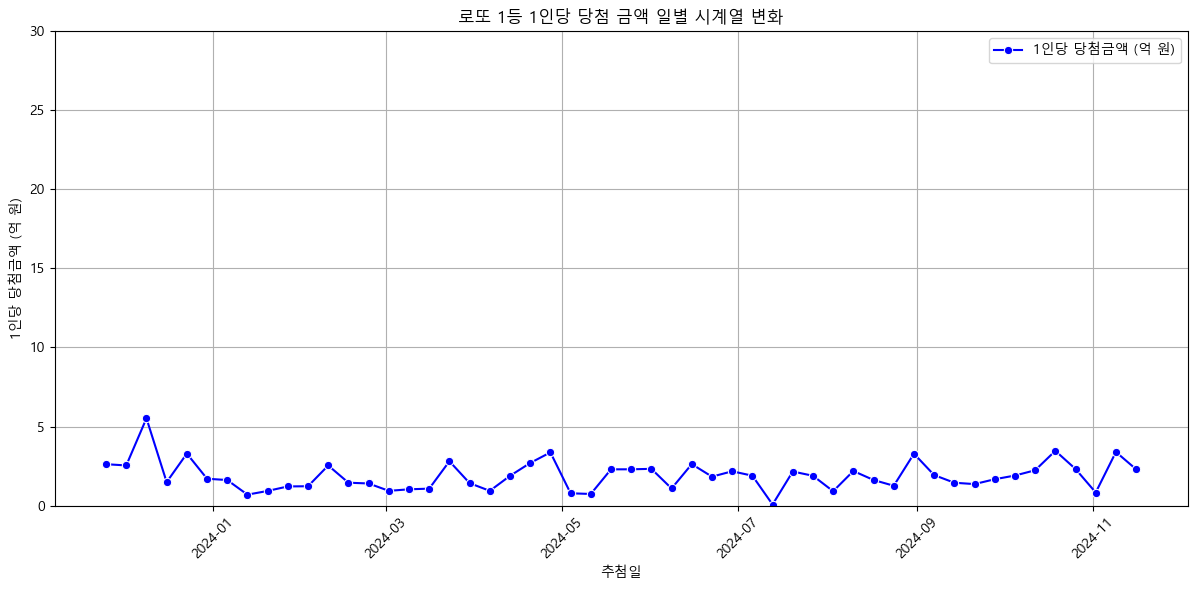

,추첨일,1등 당첨금액,1등 당첨자수,1인당 당첨금액(억 단위)
0,2002-12-07,0,0,0.0억원
1,2002-12-14,2002006800,1,20.0억원
2,2002-12-21,2000000000,1,20.0억원
3,2002-12-28,0,0,0.0억원
4,2003-01-04,0,0,0.0억원


In [27]:
# 주피터 노트북 파일로 로또 데이터 시계열 분석

# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# CSV 파일 불러오기
file_path = r"C:\Users\highk\pypy50\32. 응용 로또 크롤링\lotto_data_1_to_current.csv"
df = pd.read_csv(file_path)

# 데이터 확인
df.head()

# "1등 당첨금액" 컬럼에서 '원'을 제거하고, 정수형으로 변환 (데이터 타입을 numpy의 int64로 변환하여 큰 숫자 처리)
df["1등 당첨금액"] = df["1등 당첨금액"].str.replace('원', '').str.replace(',', '').astype(np.int64)

# "1등 당첨자수" 컬럼에서 '명'을 제거하고, 정수형으로 변환
df["1등 당첨자수"] = df["1등 당첨자수"].str.replace('명', '').astype(int)

# "추첨일"을 날짜형으로 변환
df["추첨일"] = pd.to_datetime(df["추첨일"])

# 1인당 당첨금액 계산 (NaN 및 Inf 처리 후 정수형으로 변환)
df["1인당 당첨금액"] = (df["1등 당첨금액"] / df["1등 당첨자수"]).replace([np.inf, -np.inf], np.nan).fillna(0).round(0).astype(np.int64)







# 1인당 당첨금액을 억 원 단위로 변환하고 형식 변환
df["1인당 당첨금액(억 단위)"] = df["1인당 당첨금액"].apply(lambda x: f"{x / 1e8:.1f}억원")

# 시계열 그래프 그리기 (1인당 당첨금액) - Seaborn 사용
plt.figure(figsize=(12, 6))
sns.lineplot(x="추첨일", y=df[df["추첨일"] >= pd.Timestamp.now() - pd.DateOffset(years=1)]["1인당 당첨금액"] / 1e8, data=df[df["추첨일"] >= pd.Timestamp.now() - pd.DateOffset(years=1)], marker='o', color='b', label='1인당 당첨금액 (억 원)')
plt.xlabel("추첨일")
plt.ylabel("1인당 당첨금액 (억 원)")
plt.title("로또 1등 1인당 당첨 금액 일별 시계열 변화")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.ylim(0, 30)
plt.show()

# 데이터프레임의 일부 확인
df[["추첨일", "1등 당첨금액", "1등 당첨자수", "1인당 당첨금액(억 단위)"]].head()


In [28]:
# 가장 최근의 1인당 당첨금액 확인
latest_winning_amount = df.loc[df["추첨일"].idxmax(), "1인당 당첨금액(억 단위)"]
print(f"가장 최근의 1인당 당첨금액: {latest_winning_amount}")


가장 최근의 1인당 당첨금액: 2.3억원


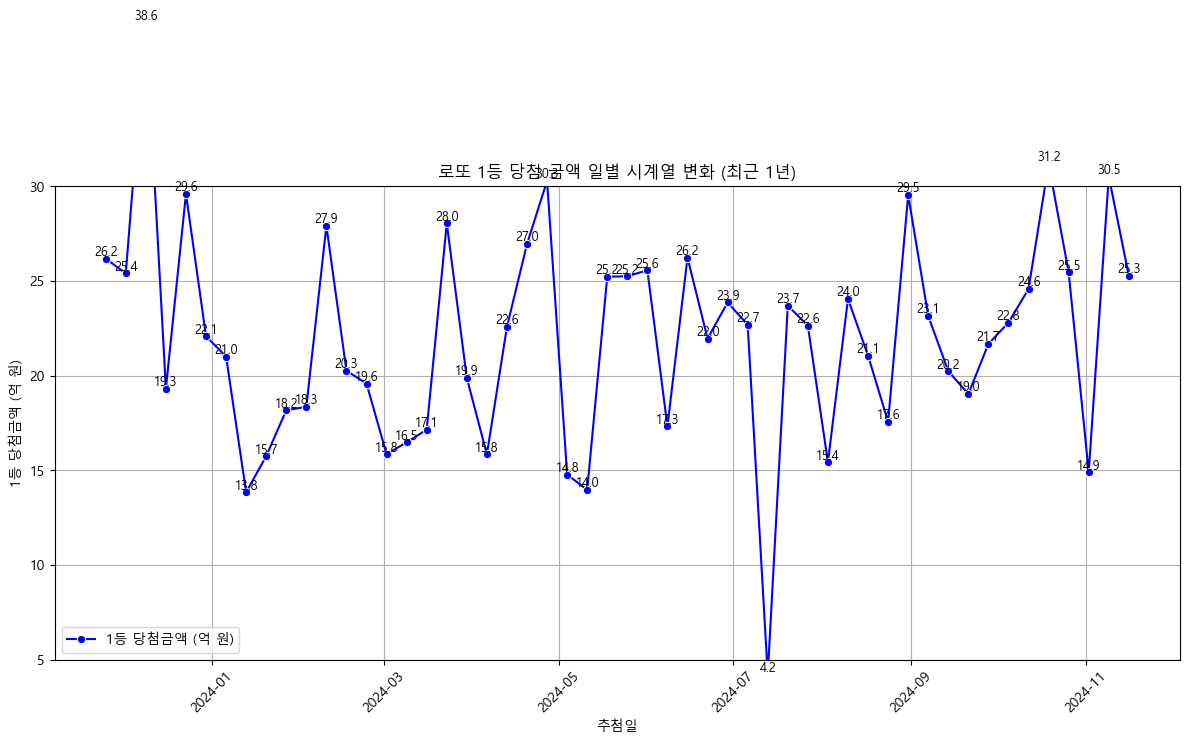

,추첨일,1등 당첨금액,1등 당첨자수,1등 당첨금액(억 단위)
0,2002-12-07,0,0,0.0억원
1,2002-12-14,2002006800,1,20.0억원
2,2002-12-21,2000000000,1,20.0억원
3,2002-12-28,0,0,0.0억원
4,2003-01-04,0,0,0.0억원


In [30]:
# 주피터 노트북 파일로 로또 데이터 시계열 분석

# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# CSV 파일 불러오기
file_path = r"C:\Users\highk\pypy50\32. 응용 로또 크롤링\lotto_data_1_to_current.csv"
df = pd.read_csv(file_path)

# 데이터 확인
df.head()

# "1등 당첨금액" 컬럼에서 '원'을 제거하고, 정수형으로 변환 (데이터 타입을 numpy의 int64로 변환하여 큰 숫자 처리)
df["1등 당첨금액"] = df["1등 당첨금액"].str.replace('원', '').str.replace(',', '').astype(np.int64)

# "1등 당첨자수" 컬럼에서 '명'을 제거하고, 정수형으로 변환
df["1등 당첨자수"] = df["1등 당첨자수"].str.replace('명', '').astype(int)

# "추첨일"을 날짜형으로 변환
df["추첨일"] = pd.to_datetime(df["추첨일"])

# 1등 당첨금액을 억 원 단위로 변환하고 형식 변환
df["1등 당첨금액(억 단위)"] = df["1등 당첨금액"].apply(lambda x: f"{x / 1e8:.1f}억원")

# 시계열 그래프 그리기 (1등 당첨금액) - Seaborn 사용 (최근 1년 데이터만 표시)
plt.figure(figsize=(12, 6))
sns.lineplot(x="추첨일", y=df[df["추첨일"] >= pd.Timestamp.now() - pd.DateOffset(years=1)]["1등 당첨금액"] / 1e8, data=df[df["추첨일"] >= pd.Timestamp.now() - pd.DateOffset(years=1)], marker='o', color='b', label='1등 당첨금액 (억 원)')

# 데이터값을 그래프 위에 표시
for x, y in zip(df[df["추첨일"] >= pd.Timestamp.now() - pd.DateOffset(years=1)]["추첨일"], df[df["추첨일"] >= pd.Timestamp.now() - pd.DateOffset(years=1)]["1등 당첨금액"] / 1e8):
    plt.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=9, color='black')
plt.xlabel("추첨일")
plt.ylabel("1등 당첨금액 (억 원)")
plt.title("로또 1등 당첨 금액 일별 시계열 변화 (최근 1년)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.ylim(5, 30)
plt.show()

# 데이터프레임의 일부 확인
df[["추첨일", "1등 당첨금액", "1등 당첨자수", "1등 당첨금액(억 단위)"]].head()


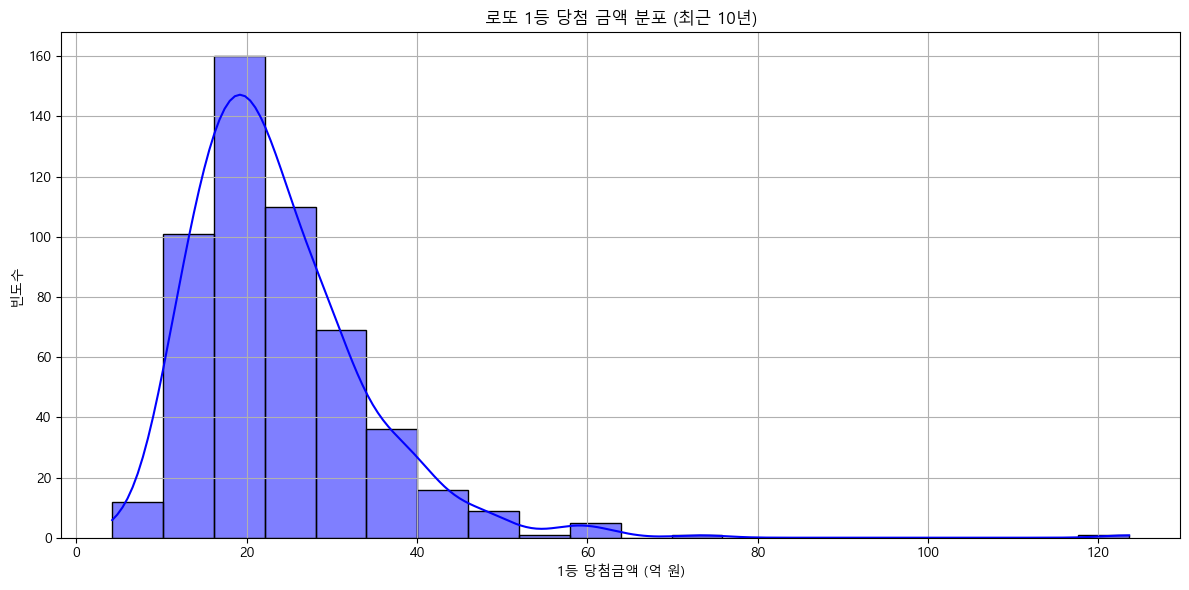

,추첨일,1등 당첨금액,1등 당첨자수,1등 당첨금액(억 단위)
0,2002-12-07,0,0,0.0억원
1,2002-12-14,2002006800,1,20.0억원
2,2002-12-21,2000000000,1,20.0억원
3,2002-12-28,0,0,0.0억원
4,2003-01-04,0,0,0.0억원


In [32]:
# 주피터 노트북 파일로 로또 데이터 시계열 분석

# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# CSV 파일 불러오기
file_path = r"C:\Users\highk\pypy50\32. 응용 로또 크롤링\lotto_data_1_to_current.csv"
df = pd.read_csv(file_path)

# 데이터 확인
df.head()

# "1등 당첨금액" 컬럼에서 '원'을 제거하고, 정수형으로 변환 (데이터 타입을 numpy의 int64로 변환하여 큰 숫자 처리)
df["1등 당첨금액"] = df["1등 당첨금액"].str.replace('원', '').str.replace(',', '').astype(np.int64)

# "1등 당첨자수" 컬럼에서 '명'을 제거하고, 정수형으로 변환
df["1등 당첨자수"] = df["1등 당첨자수"].str.replace('명', '').astype(int)

# "추첨일"을 날짜형으로 변환
df["추첨일"] = pd.to_datetime(df["추첨일"])

# 1등 당첨금액을 억 원 단위로 변환하고 형식 변환
df["1등 당첨금액(억 단위)"] = df["1등 당첨금액"].apply(lambda x: f"{x / 1e8:.1f}억원")

# 히스토그램 그리기 (1등 당첨금액) - 최근 10년 데이터만 표시
plt.figure(figsize=(12, 6))
sns.histplot(df[df["추첨일"] >= pd.Timestamp.now() - pd.DateOffset(years=10)]["1등 당첨금액"] / 1e8, bins=20, kde=True, color='b')
plt.xlabel("1등 당첨금액 (억 원)")
plt.ylabel("빈도수")
plt.title("로또 1등 당첨 금액 분포 (최근 10년)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 데이터프레임의 일부 확인
df[["추첨일", "1등 당첨금액", "1등 당첨자수", "1등 당첨금액(억 단위)"]].head()


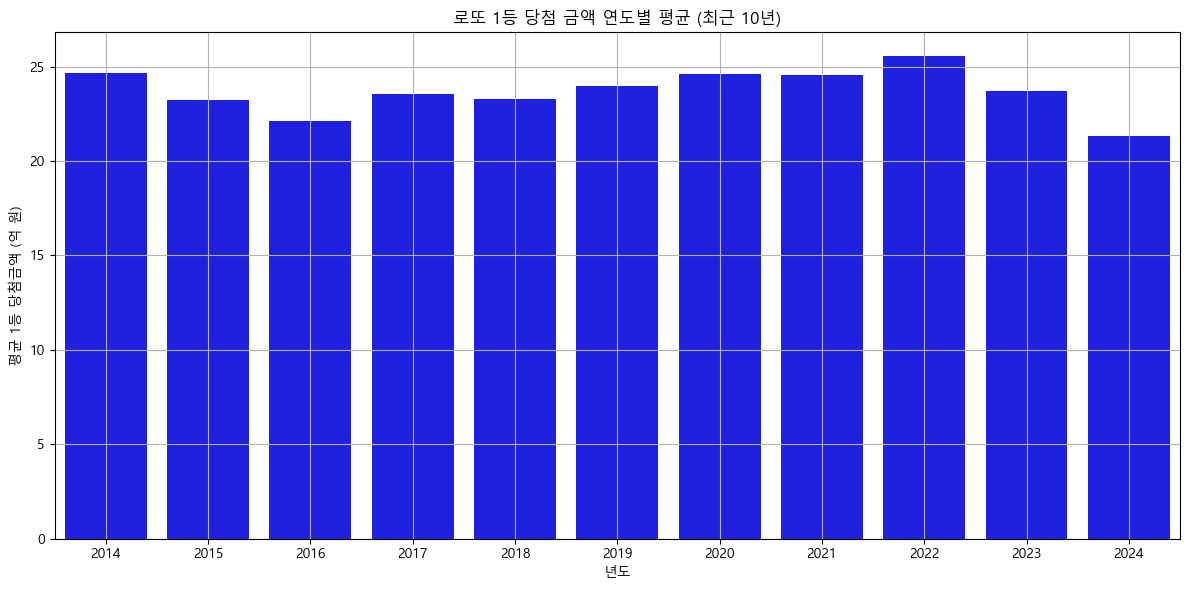

,추첨일,1등 당첨금액,1등 당첨자수,1등 당첨금액(억 단위)
0,2002-12-07,0,0,0.0억원
1,2002-12-14,2002006800,1,20.0억원
2,2002-12-21,2000000000,1,20.0억원
3,2002-12-28,0,0,0.0억원
4,2003-01-04,0,0,0.0억원


In [33]:
# 주피터 노트북 파일로 로또 데이터 시계열 분석

# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# CSV 파일 불러오기
file_path = r"C:\Users\highk\pypy50\32. 응용 로또 크롤링\lotto_data_1_to_current.csv"
df = pd.read_csv(file_path)

# 데이터 확인
df.head()

# "1등 당첨금액" 컬럼에서 '원'을 제거하고, 정수형으로 변환 (데이터 타입을 numpy의 int64로 변환하여 큰 숫자 처리)
df["1등 당첨금액"] = df["1등 당첨금액"].str.replace('원', '').str.replace(',', '').astype(np.int64)

# "1등 당첨자수" 컬럼에서 '명'을 제거하고, 정수형으로 변환
df["1등 당첨자수"] = df["1등 당첨자수"].str.replace('명', '').astype(int)

# "추첨일"을 날짜형으로 변환
df["추첨일"] = pd.to_datetime(df["추첨일"])

# 1등 당첨금액을 억 원 단위로 변환하고 형식 변환
df["1등 당첨금액(억 단위)"] = df["1등 당첨금액"].apply(lambda x: f"{x / 1e8:.1f}억원")

# 막대그래프 그리기 (1등 당첨금액) - 최근 10년 데이터만 표시
plt.figure(figsize=(12, 6))
sns.barplot(x=df[df["추첨일"] >= pd.Timestamp.now() - pd.DateOffset(years=10)]["추첨일"].dt.year.unique(), y=df[df["추첨일"] >= pd.Timestamp.now() - pd.DateOffset(years=10)].groupby(df["추첨일"].dt.year)["1등 당첨금액"].mean() / 1e8, color='b')
plt.xlabel("년도")
plt.ylabel("평균 1등 당첨금액 (억 원)")
plt.title("로또 1등 당첨 금액 연도별 평균 (최근 10년)")
plt.grid(True)
plt.tight_layout()
plt.show()

# 데이터프레임의 일부 확인
df[["추첨일", "1등 당첨금액", "1등 당첨자수", "1등 당첨금액(억 단위)"]].head()


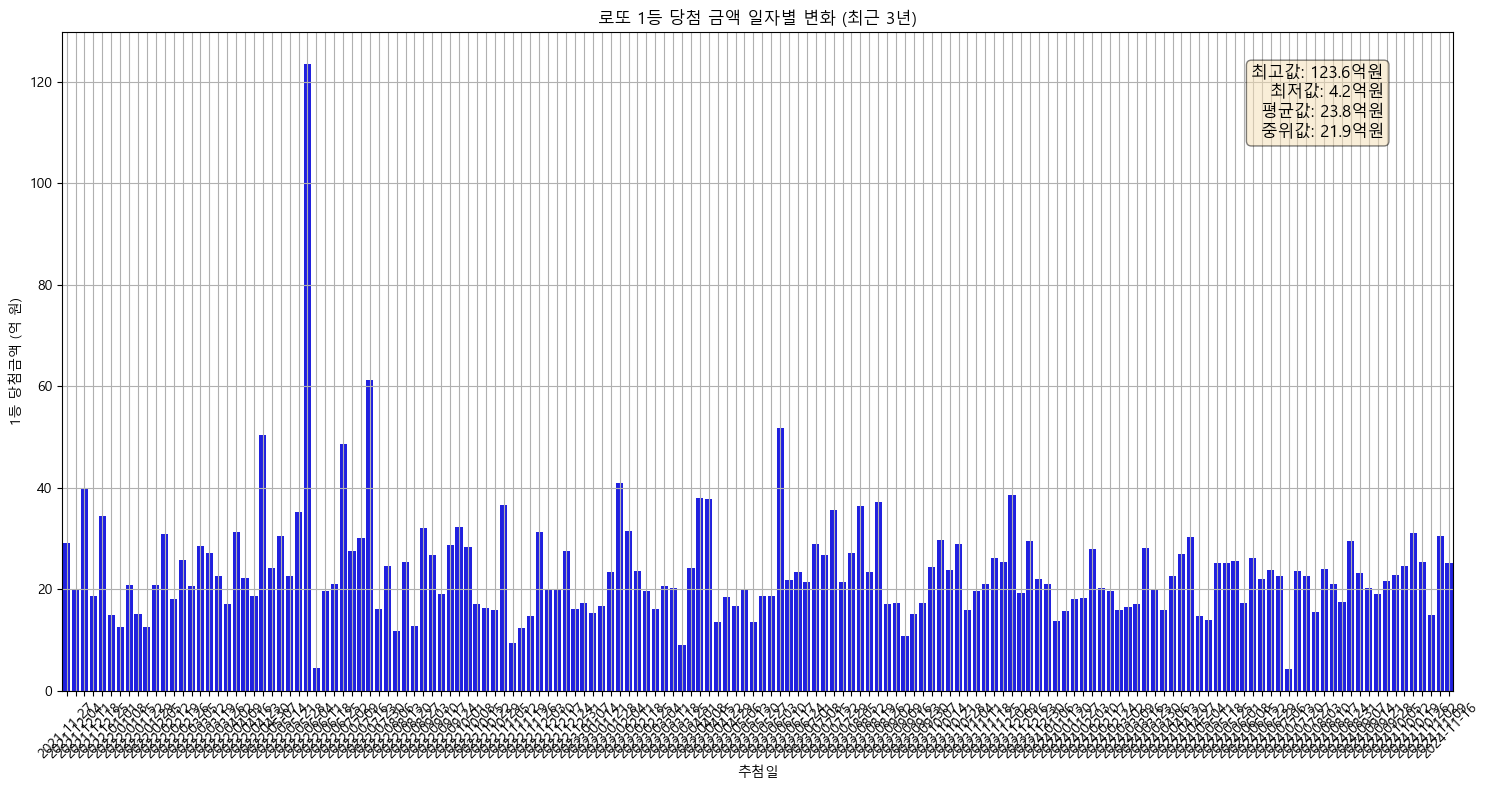

,추첨일,1등 당첨금액,1등 당첨자수,1등 당첨금액(억 단위)
0,2002-12-07,0,0,0.0억원
1,2002-12-14,2002006800,1,20.0억원
2,2002-12-21,2000000000,1,20.0억원
3,2002-12-28,0,0,0.0억원
4,2003-01-04,0,0,0.0억원


In [36]:
# 주피터 노트북 파일로 로또 데이터 시계열 분석

# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# CSV 파일 불러오기
file_path = r"C:\Users\highk\pypy50\32. 응용 로또 크롤링\lotto_data_1_to_current.csv"
df = pd.read_csv(file_path)

# 데이터 확인
df.head()

# "1등 당첨금액" 컬럼에서 '원'을 제거하고, 정수형으로 변환 (데이터 타입을 numpy의 int64로 변환하여 큰 숫자 처리)
df["1등 당첨금액"] = df["1등 당첨금액"].str.replace('원', '').str.replace(',', '').astype(np.int64)

# "1등 당첨자수" 컬럼에서 '명'을 제거하고, 정수형으로 변환
df["1등 당첨자수"] = df["1등 당첨자수"].str.replace('명', '').astype(int)

# "추첨일"을 날짜형으로 변환
df["추첨일"] = pd.to_datetime(df["추첨일"])

# 1등 당첨금액을 억 원 단위로 변환하고 형식 변환
df["1등 당첨금액(억 단위)"] = df["1등 당첨금액"].apply(lambda x: f"{x / 1e8:.1f}억원")

# 막대그래프 그리기 (1등 당첨금액) - 최근 3년 데이터만 일자별로 표시
plt.figure(figsize=(15, 8))
recent_3_years = df[df["추첨일"] >= pd.Timestamp.now() - pd.DateOffset(years=3)]
sns.barplot(x=recent_3_years["추첨일"], y=recent_3_years["1등 당첨금액"] / 1e8, color='b')
plt.xlabel("추첨일")
plt.ylabel("1등 당첨금액 (억 원)")
plt.title("로또 1등 당첨 금액 일자별 변화 (최근 3년)")
plt.xticks(rotation=45)
plt.grid(True)
# 통계 정보 계산
max_value = recent_3_years["1등 당첨금액"].max() / 1e8
min_value = recent_3_years["1등 당첨금액"].min() / 1e8
mean_value = recent_3_years["1등 당첨금액"].mean() / 1e8
median_value = recent_3_years["1등 당첨금액"].median() / 1e8

# 박스 형태로 통계 정보 표시
textstr = f'''최고값: {max_value:.1f}억원
최저값: {min_value:.1f}억원
평균값: {mean_value:.1f}억원
중위값: {median_value:.1f}억원'''
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(0.95, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
               verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.show()

# 데이터프레임의 일부 확인
df[["추첨일", "1등 당첨금액", "1등 당첨자수", "1등 당첨금액(억 단위)"]].head()


C:\Users\highk\AppData\Local\Temp\ipykernel_30464\3637582839.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=number_counts.index, y=number_counts.values, palette="viridis")


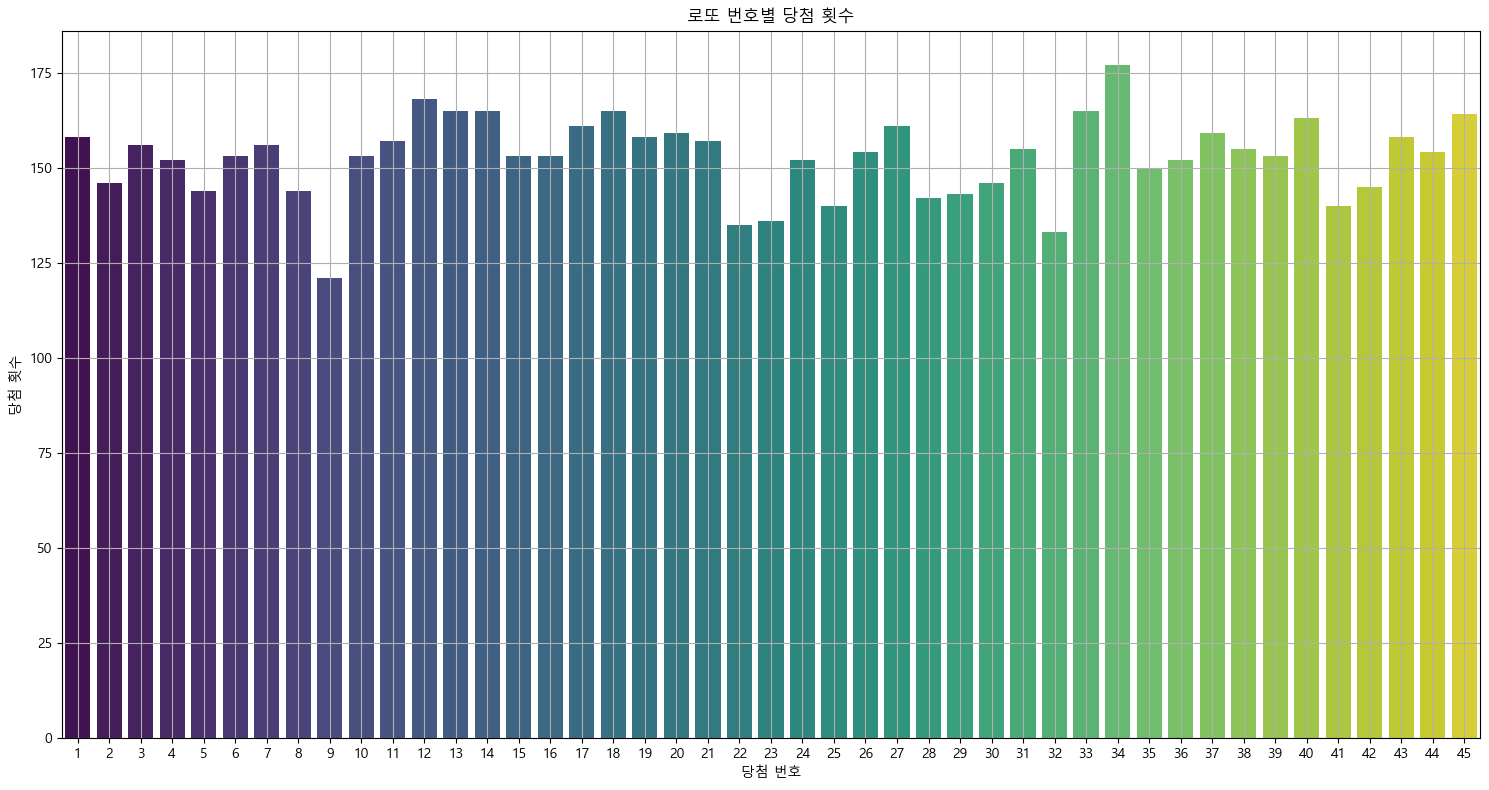

In [ ]:
# 주피터 노트북 파일로 로또 데이터 시계열 분석

# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# CSV 파일 불러오기
file_path = r"C:\Users\highk\pypy50\32. 응용 로또 크롤링\lotto_data_1_to_current.csv"
df = pd.read_csv(file_path)

# 데이터 확인
df.head()

# "1등 당첨금액" 컬럼에서 '원'을 제거하고, 정수형으로 변환 (데이터 타입을 numpy의 int64로 변환하여 큰 숫자 처리)
df["1등 당첨금액"] = df["1등 당첨금액"].str.replace('원', '').str.replace(',', '').astype(np.int64)

# "1등 당첨자수" 컬럼에서 '명'을 제거하고, 정수형으로 변환
df["1등 당첨자수"] = df["1등 당첨자수"].str.replace('명', '').astype(int)

# "추첨일"을 날짜형으로 변환
df["추첨일"] = pd.to_datetime(df["추첨일"])

# 당첨 번호를 분리 (가정: 당첨 번호가 '1등 번호' 컬럼에 쉼표로 구분된 문자열 형태로 저장되어 있음)
df_numbers = df["1등 번호"].str.split(',', expand=True)
df_numbers.columns = ["번호1", "번호2", "번호3", "번호4", "번호5", "번호6"]

# 원본 데이터프레임에 분리된 번호 컬럼 추가
df = pd.concat([df, df_numbers], axis=1)

# 번호 컬럼을 정수형으로 변환
number_columns = ["번호1", "번호2", "번호3", "번호4", "번호5", "번호6"]
df[number_columns] = df[number_columns].astype(int)

# 번호별 당첨 횟수 계산
number_counts = df[number_columns].melt(value_name="당첨번호")["당첨번호"].value_counts().sort_index()

# 번호별 당첨 횟수 시각화
plt.figure(figsize=(15, 8))
sns.barplot(x=number_counts.index, y=number_counts.values, palette="viridis")
plt.xlabel("당첨 번호")
plt.ylabel("당첨 횟수")
plt.title("로또 번호별 당첨 횟수")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\highk\AppData\Local\Temp\ipykernel_30464\2592240519.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=number_counts.index, y=number_counts.values, palette="viridis")


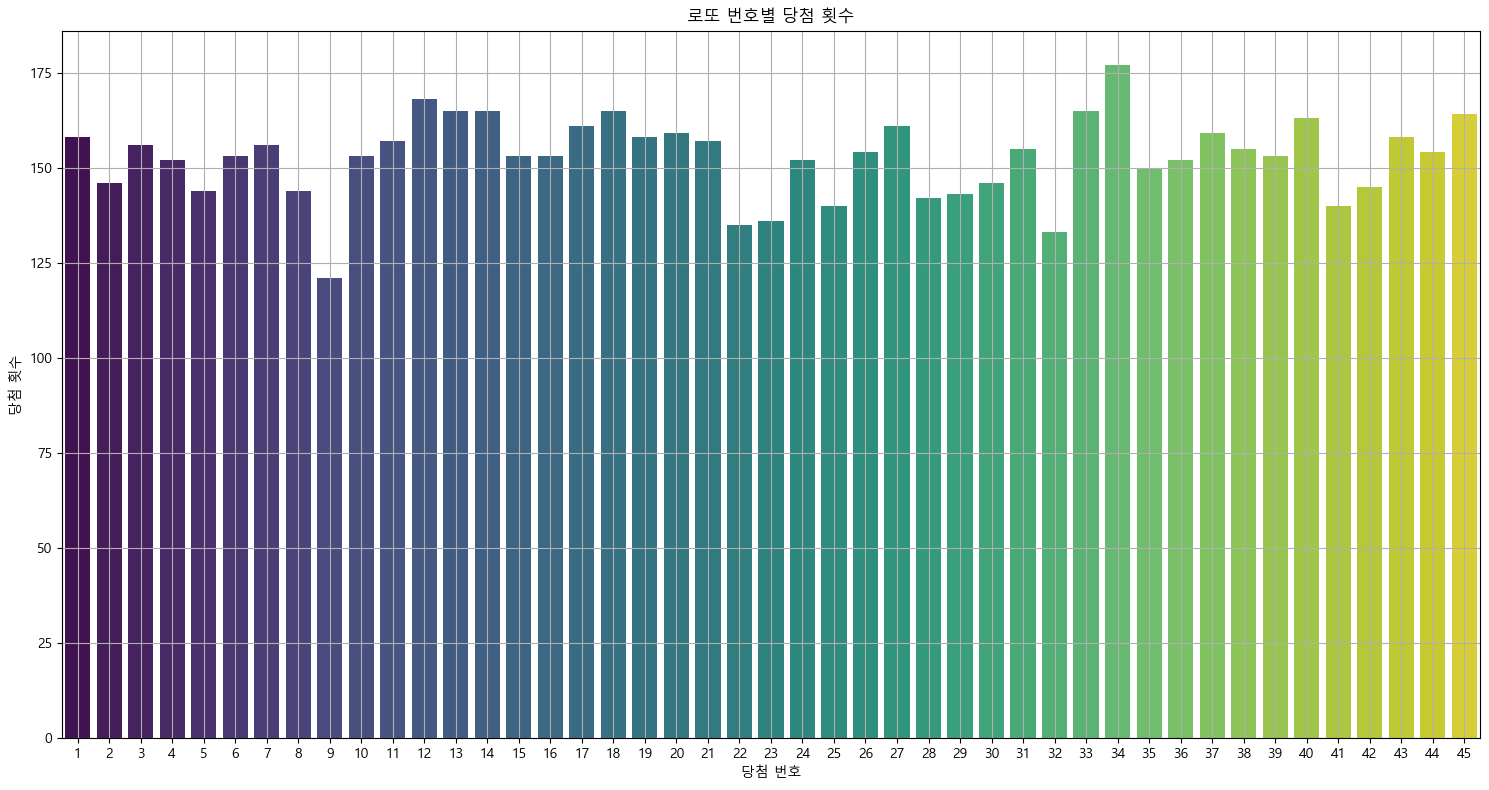

In [43]:
# 주피터 노트북 파일로 로또 데이터 시계열 분석

# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# CSV 파일 불러오기
file_path = r"C:\Users\highk\pypy50\32. 응용 로또 크롤링\lotto_data_1_to_current.csv"
df = pd.read_csv(file_path)

# 데이터 확인
df.head()

# "1등 당첨금액" 컬럼에서 '원'을 제거하고, 정수형으로 변환 (데이터 타입을 numpy의 int64로 변환하여 큰 숫자 처리)
df["1등 당첨금액"] = df["1등 당첨금액"].str.replace('원', '').str.replace(',', '').astype(np.int64)

# "1등 당첨자수" 컬럼에서 '명'을 제거하고, 정수형으로 변환
df["1등 당첨자수"] = df["1등 당첨자수"].str.replace('명', '').astype(int)

# "추첨일"을 날짜형으로 변환
df["추첨일"] = pd.to_datetime(df["추첨일"])

# 당첨 번호를 분리 (가정: 당첨 번호가 '1등 번호' 컬럼에 쉼표로 구분된 문자열 형태로 저장되어 있음)
df_numbers = df["1등 번호"].str.split(',', expand=True)
df_numbers.columns = ["번호1", "번호2", "번호3", "번호4", "번호5", "번호6"]

# 원본 데이터프레임에 분리된 번호 컬럼 추가
df = pd.concat([df, df_numbers], axis=1)

# 번호 컬럼을 정수형으로 변환
number_columns = ["번호1", "번호2", "번호3", "번호4", "번호5", "번호6"]
df[number_columns] = df[number_columns].astype(int)

# 번호별 당첨 횟수 계산
number_counts = df[number_columns].melt(value_name="당첨번호")["당첨번호"].value_counts().sort_index()

# 번호별 당첨 횟수 시각화
plt.figure(figsize=(15, 8))
sns.barplot(x=number_counts.index, y=number_counts.values, palette="viridis")
plt.xlabel("당첨 번호")
plt.ylabel("당첨 횟수")
plt.title("로또 번호별 당첨 횟수")
plt.grid(True)
plt.tight_layout()
plt.savefig('lotto_number_counts.jpg', format='jpg')
plt.show()
